Exploring the MVSEC dataset
---



(Any code before the "Original Work" section was obtained from the repository: https://github.com/SensorsINI/MVSEC-NIGHTL21)

## Clone the resources

In [18]:
# # Clone and install
# !git clone https://github.com/SensorsINI/MVSEC-NIGHTL21
# %cd ./MVSEC-NIGHTL21

## Get the MVSEC data

The dataset is about 9 GB, will take a while.

In [19]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1z8b00gWoZnGuzAOSD49KFaX03q1UuKxc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1z8b00gWoZnGuzAOSD49KFaX03q1UuKxc" -O /content/outdoor_night1_data.hdf5 && rm -rf /tmp/cookies.txt

 ## Run visualization!

In [20]:
# !python visualize_mvsec_nightl21.py --mvsec_data /content/outdoor_night1_data.hdf5 --gt_root ./mvsec_nightl21_labels/ --colab

## Watch the Video!

In [21]:
# # necessary to convert for another time so that colab can display it.
# !ffmpeg -y -i ./output.mp4 /tmp/output.mp4 -loglevel quiet
# from IPython.display import HTML
# from base64 import b64encode

# mp4 = open("/tmp/output.mp4",'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("<video controls src={} width=50%/>".format(data_url))

#  Original Work

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rosbag_pandas

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [23]:
# filename = "datasets/outdoor_day1_data.hdf5"
filename = "datasets/indoor_flying2_data.hdf5"

# df_bag = rosbag_pandas.bag_to_dataframe(filename)

In [24]:
# bag = rosbag.Bag(filename)
# messages = []
# for topic, msg, t in bag.read_messages(topics=['/davis/left/events']):
#     messages.append(msg)
# bag.close()

In [25]:
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())

    events_np = np.array(f['davis']['left']['events'])             # events from the left camera
#     images_left = np.array(f['davis']['left']['image_raw'])        # images (frames) from the left camera
    n_frames = f['davis']['left']['image_raw'].shape[0]             # number of frames
    frame_dim = f['davis']['left']['image_raw'].shape[1:]          # frame dimensions
    
#     print(type(images_left))
    

Keys: <KeysViewHDF5 ['davis', 'velodyne']>


In [26]:
import cv2
import time

In [27]:
# for frame in images_left:
#     plt.imshow(frame)

# plt.imshow(images_left[1])

# for i in range(len(images_left)):
#     plt.imshow(images_left[i])

In [28]:
print(n_frames)
print(frame_dim)
print(len(events_np))

2665
(260, 346)
25043556


In [29]:
df_events = pd.DataFrame(events_np).rename(columns = {0:'x', 1:'y', 2:'ts', 3:'p'})

In [30]:
df_events

,x,y,ts,p
0,255.0,118.0,1.504645e+09,1.0
1,331.0,251.0,1.504645e+09,-1.0
2,48.0,111.0,1.504645e+09,1.0
3,243.0,171.0,1.504645e+09,1.0
4,305.0,46.0,1.504645e+09,-1.0
...,...,...,...,...
25043551,254.0,30.0,1.504645e+09,1.0
25043552,339.0,241.0,1.504645e+09,1.0
25043553,195.0,113.0,1.504645e+09,1.0
25043554,123.0,150.0,1.504645e+09,-1.0


In [36]:
type(df_events.iloc[0]['p'])

numpy.float64

# Visualisation

In [162]:
events_slice = df_events.iloc[0:]
events_slice

,x,y,ts,p
0,255.0,118.0,1.504645e+09,1.0
1,331.0,251.0,1.504645e+09,-1.0
2,48.0,111.0,1.504645e+09,1.0
3,243.0,171.0,1.504645e+09,1.0
4,305.0,46.0,1.504645e+09,-1.0
...,...,...,...,...
25043551,254.0,30.0,1.504645e+09,1.0
25043552,339.0,241.0,1.504645e+09,1.0
25043553,195.0,113.0,1.504645e+09,1.0
25043554,123.0,150.0,1.504645e+09,-1.0


In [163]:
events_slice_np = events_slice.to_numpy()
events_slice_np

array([[ 2.55000000e+02,  1.18000000e+02,  1.50464527e+09,
         1.00000000e+00],
       [ 3.31000000e+02,  2.51000000e+02,  1.50464527e+09,
        -1.00000000e+00],
       [ 4.80000000e+01,  1.11000000e+02,  1.50464527e+09,
         1.00000000e+00],
       ...,
       [ 1.95000000e+02,  1.13000000e+02,  1.50464535e+09,
         1.00000000e+00],
       [ 1.23000000e+02,  1.50000000e+02,  1.50464535e+09,
        -1.00000000e+00],
       [ 1.57000000e+02,  1.74000000e+02,  1.50464535e+09,
         1.00000000e+00]])

In [164]:
xyz = events_slice_np[:, :3]
polarity = events_slice_np[:, 3]

In [165]:
xyz

array([[2.55000000e+02, 1.18000000e+02, 1.50464527e+09],
       [3.31000000e+02, 2.51000000e+02, 1.50464527e+09],
       [4.80000000e+01, 1.11000000e+02, 1.50464527e+09],
       ...,
       [1.95000000e+02, 1.13000000e+02, 1.50464535e+09],
       [1.23000000e+02, 1.50000000e+02, 1.50464535e+09],
       [1.57000000e+02, 1.74000000e+02, 1.50464535e+09]])

In [166]:
# plt.figure(figsize=(4, 4), dpi=150)
# ax = plt.axes(projection='3d')
# ax.azim = 20
# ax.elev = 20
# ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = polarity, s=0.01)

# Analysing frequency of events

In [167]:
import datetime

In [168]:
events_freq = df_events.copy()
events_freq['ts'] = events_freq['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))   # converting timestamps to datetime format                                                                    #convert timestamps to ts
events_freq['freq'] = 1                         # frequency of events
events_freq = events_freq.set_index('ts')       # set ts as index
events_freq_res = events_freq['freq'].resample('ms').sum().to_frame()       # resample to find events per ms

In [169]:
events_freq_res

,freq
ts,
2017-09-05 22:01:07.716,6
2017-09-05 22:01:07.717,4
2017-09-05 22:01:07.718,3
2017-09-05 22:01:07.719,6
2017-09-05 22:01:07.720,2
...,...
2017-09-05 22:02:32.651,9
2017-09-05 22:02:32.652,5
2017-09-05 22:02:32.653,9


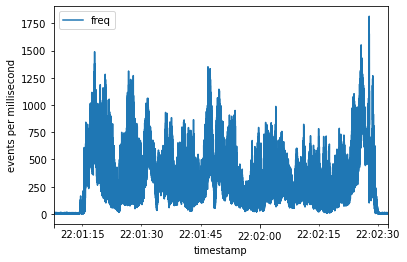

In [170]:
ax0 = events_freq_res.iloc[:].plot(xlabel = 'timestamp', ylabel = 'events per millisecond')

Text(0.5, 1.0, 'histogram')

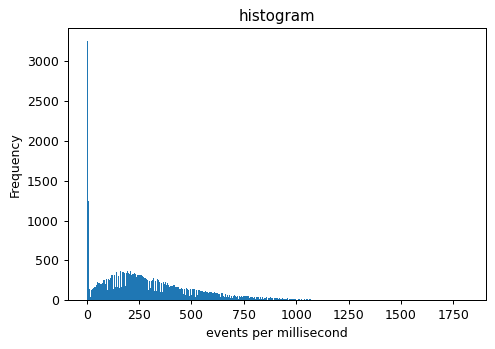

In [171]:
plt.figure(dpi=90)
ax1 = events_freq_res['freq'].plot.hist(bins=1000)
ax1.set_xlabel('events per millisecond')
ax1.set_title('histogram')

294.8381916647045

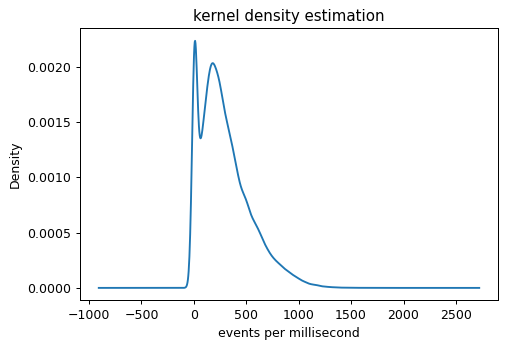

In [172]:
plt.figure(dpi=90)
ax2 = events_freq_res['freq'].plot.kde()
ax2.set_xlabel('events per millisecond')
ax2.set_title('kernel density estimation')
np.mean(events_freq_res['freq'])

In [173]:
print('Mean: ', np.mean(events_freq_res['freq']))
print('Median: ', np.median(events_freq_res['freq']))
print('Std deviation: ', np.std(events_freq_res['freq']))

Mean:  294.8381916647045
Median:  246.0
Std deviation:  236.93017036408116


In [174]:
duration_td = max(events_freq_res.reset_index()['ts']) - min(events_freq_res.reset_index()['ts'])

In [175]:
# duration
duration_td

Timedelta('0 days 00:01:24.939000')

In [176]:
# number of events:
len(df_events.index)

25043556